# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

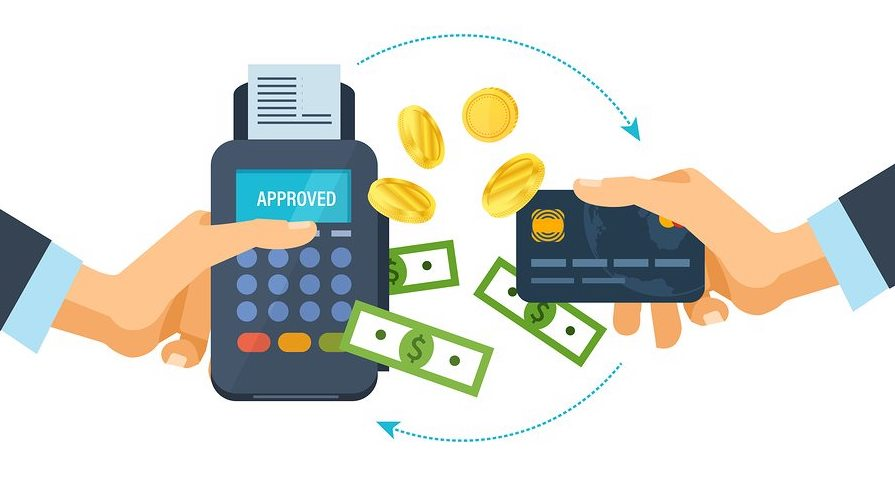

## <b> Problem Description </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments


## <b> Data Description </b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

**Importing important libraries**

In [133]:
#Importing all the required libraries and metrics
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")


from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import roc_auc_score, confusion_matrix
from sklearn.model_selection import cross_val_score

**Mounting the drive and importing the dataset**

In [2]:
# Mounting the drive first

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
pip install --upgrade xlrd

     |████████████████████████████████| 96 kB 4.1 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


In [3]:
#Loading and reading the dataset

df = pd.read_excel('/content/drive/My Drive/Projects/classification/default of credit card clients.xls')

In [4]:
df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


# Dataset information

This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.

#Problem Description

This project is aimed at predicting the case of customers default payments in Taiwan. 

From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. 

We can use the **K-S chart** to evaluate which customers will default on their credit card payments

#Content
There are 25 variables:

0 : ID: ID of each client


X1 : LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit


X2 : SEX: Gender (1=male, 2=female)


X3 : EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)


X4 : MARRIAGE: Marital status (1=married, 2=single, 3=others)


X5 : AGE: Age in years


X6 : PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)


X7 : PAY_2: Repayment status in August, 2005 (scale same as above)


X8 : PAY_3: Repayment status in July, 2005 (scale same as above)


X9 : PAY_4: Repayment status in June, 2005 (scale same as above)


X10 : PAY_5: Repayment status in May, 2005 (scale same as above)


X11 : PAY_6: Repayment status in April, 2005 (scale same as above)


X12 : BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)


X13 : BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)


X14 : BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)


X15 : BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)


X16 : BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)


X17 : BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)


X18 : PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)


X19 : PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)


X20 : PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)


X21 : PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)


X22 : PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)


X23 : PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

Y : default payment next month


default.payment.next.month: Default payment (1=yes, 0=no)

**Some ideas for exploration:**

How does the probability of default payment vary by categories of different demographic variables?


Which variables are the strongest predictors of default payment?

#Exploratory Data Analysis

Let us get the names of columns that we have

In [5]:
df.columns

Index(['Unnamed: 0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9',
       'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19',
       'X20', 'X21', 'X22', 'X23', 'Y'],
      dtype='object')

In [7]:
#Creating a copy of original dataset
data = df.copy()
data.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


Let's have an insight of the dataset

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  30001 non-null  object
 1   X1          30001 non-null  object
 2   X2          30001 non-null  object
 3   X3          30001 non-null  object
 4   X4          30001 non-null  object
 5   X5          30001 non-null  object
 6   X6          30001 non-null  object
 7   X7          30001 non-null  object
 8   X8          30001 non-null  object
 9   X9          30001 non-null  object
 10  X10         30001 non-null  object
 11  X11         30001 non-null  object
 12  X12         30001 non-null  object
 13  X13         30001 non-null  object
 14  X14         30001 non-null  object
 15  X15         30001 non-null  object
 16  X16         30001 non-null  object
 17  X17         30001 non-null  object
 18  X18         30001 non-null  object
 19  X19         30001 non-null  object
 20  X20   

We can see that this dataset does not have any null value.
By looking into data, we can observe different columns of bill amount and pay amount can be related to each other, so we can use different classifiers
which can bypass VIF maybe.

In [9]:
data.columns = data.iloc[0]
data.drop(labels= 0, axis = 0, inplace = True)

In [10]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [13]:
# Summary Statistics
data.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,...,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000
unique,30000,81,2,7,4,56,11,11,11,11,...,21548,21010,20604,7943,7899,7518,6937,6897,6939,2
top,1,50000,2,2,2,29,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
freq,1,3365,18112,14030,15964,1605,14737,15730,15764,16455,...,3195,3506,4020,5249,5396,5968,6408,6703,7173,23364


Renaming PAY_0 to PAY_1 and default payment next month to Default.Also Dropping ID column which is not of our use here.

In [14]:
# rename variable 'PAY_0' to 'PAY_1' 
data.rename(columns={"PAY_0": "PAY_1"}, inplace=True)

# rename target variable: 'default.payment.next.month' to 'Default'
data.rename(columns={"default payment next month": "Default"}, inplace=True)

# drop first attribute "ID"
data.drop('ID', axis = 1, inplace =True)
# Class label to category
data["Default"] = data["Default"].astype('category')

Now we will be calculating percentage of **defaulters** present in our dataset

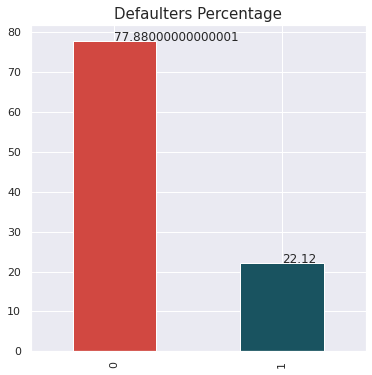

In [15]:
ax = data['Default'].value_counts(normalize = True)*100
ax.plot.bar(figsize=(6,6), color = ('#d14841','#195360'))

plt.title("Defaulters Percentage", fontsize=15)
for x,y in zip([0,1],ax):
    plt.text(x,y,y,fontsize=12)
plt.show()

Clearly we have **22% defaulters** in our dataset and 77% persons are non defaulters

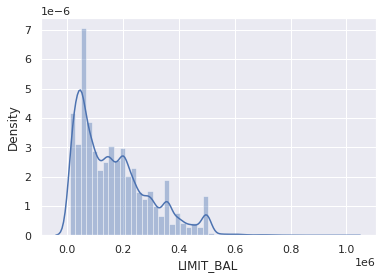

In [16]:
sns.distplot(data['LIMIT_BAL'])

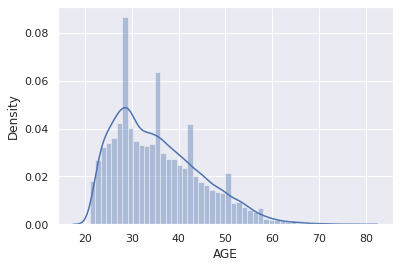

In [17]:
sns.distplot(data['AGE'])

The data shows that most people are of **age range 20-40** and a few only from 50-60 age group

lets check the defaulters by **age**, **sex**, limit balance

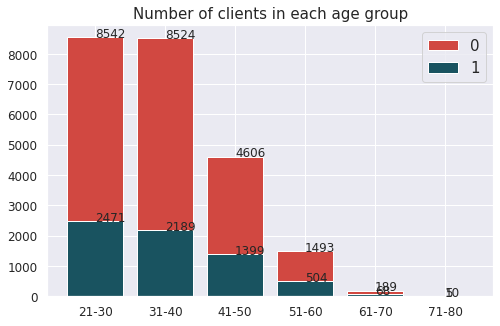

In [19]:
bins = [20,30,40,50,60,70,80]
names = ['21-30','31-40','41-50','51-60','61-70','71-80']
data['AGE_BIN'] = pd.cut(x=data.AGE, bins=bins, labels=names, right=True)

age_cnt = data.AGE_BIN.value_counts()
age_0 = (data.AGE_BIN[data['Default'] == 0].value_counts())
age_1 = (data.AGE_BIN[data['Default'] == 1].value_counts())

plt.subplots(figsize=(8,5))
# sns.barplot(data=defaulters, x='AGE_BIN', y='LIMIT_BAL', hue='def_pay', ci=0)
plt.bar(age_0.index, age_0.values, label='0', color = ('#d14841'))
plt.bar(age_1.index, age_1.values, label='1', color = ('#195360'))
for x,y in zip(names,age_0):
    plt.text(x,y,y,fontsize=12)
for x,y in zip(names,age_1):
    plt.text(x,y,y,fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Number of clients in each age group", fontsize=15)
plt.legend(loc='upper right', fontsize=15)
plt.show()

We have maximum clients from 21-30 age group followed by 31-40. 
Hence with increasing age group the number of clients that will default the payment next month is decreasing.

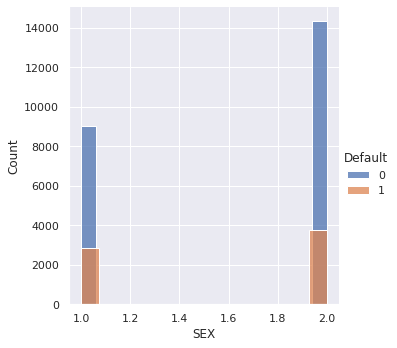

In [21]:
sns.FacetGrid(data, hue = 'Default', size = 5).map(sns.histplot, 'SEX').add_legend()

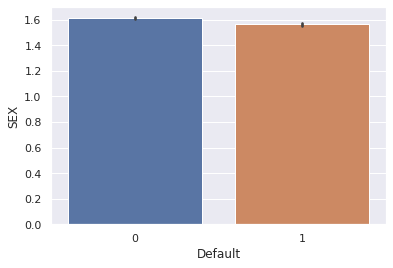

In [26]:
sns.barplot(x ='Default', y ='SEX', data = data)

Now we will be calculating **number of defaulters** with respect to **Gender** and their respective **Age**

Text(0.5, 1.0, 'Number of defaulters order by Sex')

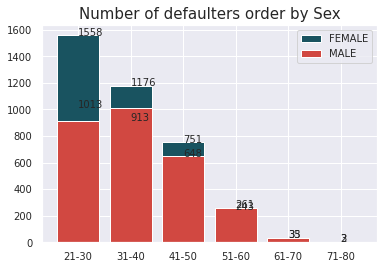

In [28]:
bins_sex = [20,30,40,50,60,70,80]
names = ['21-30','31-40','41-50','51-60','61-70','71-80']

sex_1 = data[data['SEX'] == 1][data['Default'] ==1]['AGE_BIN'].value_counts()
sex_2 = data[data['SEX'] == 2][data['Default'] ==1]['AGE_BIN'].value_counts()


plt.bar(sex_2.index, sex_2.values, label='FEMALE', color = ('#195360'))
plt.bar(sex_1.index, sex_1.values, label='MALE', color = ('#d14841'))

for x,y in zip(names,sex_2):
    plt.text(x,y,y,fontsize=10)

for x,y in zip(names,sex_1):
    plt.text(x,y,y,fontsize=10)

plt.xticks(fontsize=10)
plt.yticks(fontsize= 10)

plt.legend(loc='upper right', fontsize=10)
plt.title("Number of defaulters order by Sex", fontsize=15)

Number of defaulters order by Sex
we have female defaulters more than males in 20-30 age group

In [29]:
data['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [30]:
data['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

we should remove these 54 entries of 'MARRIAGE' AND 'EDUCATION' or we can fill them with mode.

In [31]:
# category '0' undocumented is deleted
data = data.drop(data[data['MARRIAGE']==0].index)
# we could also group the 0 category with 3:others
# data['MARRIAGE']=np.where(data['MARRIAGE'] == 0, 3, data['MARRIAGE'])

# categories 0, 5 and 6 are unknown and are deleted
data = data.drop(data[data['EDUCATION']==0].index)
data = data.drop(data[data['EDUCATION']==5].index)
data = data.drop(data[data['EDUCATION']==6].index)

**Plotting defaulters by their Marriage**

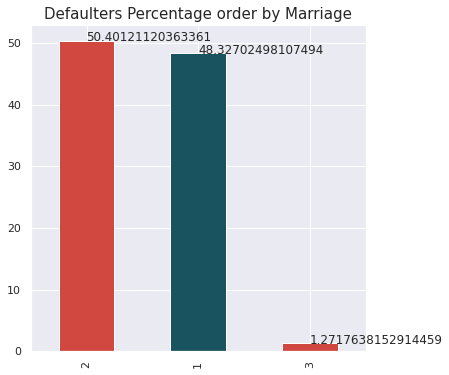

In [34]:
ax = data[data['Default'] == 1]['MARRIAGE'].value_counts(normalize = True)*100
ax.plot.bar(figsize=(6,6), color = ('#d14841','#195360'))

plt.title("Defaulters Percentage order by Marriage", fontsize=15)

for x,y in zip([0,1,2],ax):
    plt.text(x,y,y,fontsize=12)
plt.show()

<Figure size 720x720 with 0 Axes>

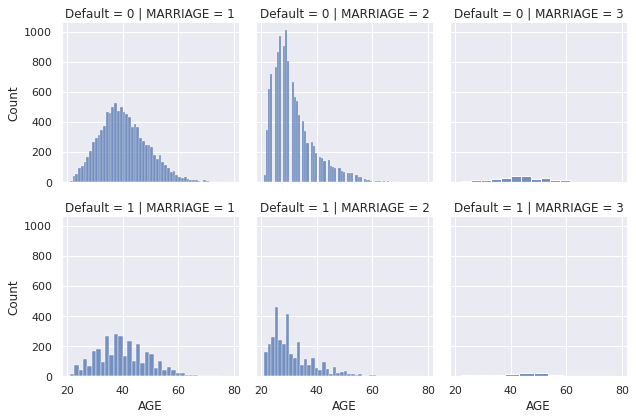

In [36]:
plt.figure(figsize=(10,10))
sns.FacetGrid(data, row='Default', col = 'MARRIAGE').map(sns.histplot, 'AGE')

We can see there is **no trend or behaviour** of married or unmarried people as a defaulter.

**Plotting defaulters by their Education**

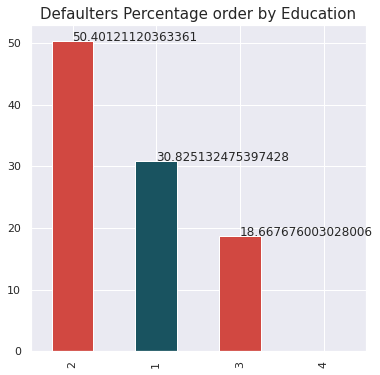

In [35]:
ax = data[data['Default'] == 1]['EDUCATION'].value_counts(normalize = True)*100
ax.plot.bar(figsize=(6,6), color = ('#d14841','#195360'))

plt.title("Defaulters Percentage order by Education", fontsize=15)

for x,y in zip([0,1,2],ax):
    plt.text(x,y,y,fontsize=12)
plt.show()

**University level** student tend to **default** more followed by **graduate** and **high school** students.

In [37]:
data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default,AGE_BIN
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,689,0,0,0,0,1,21-30
2,120000,2,2,2,26,-1,2,0,0,0,...,3455,3261,0,1000,1000,1000,0,2000,1,21-30
3,90000,2,2,2,34,0,0,0,0,0,...,14948,15549,1518,1500,1000,1000,1000,5000,0,31-40
4,50000,2,2,1,37,0,0,0,0,0,...,28959,29547,2000,2019,1200,1100,1069,1000,0,31-40
5,50000,1,2,1,57,-1,0,-1,0,0,...,19146,19131,2000,36681,10000,9000,689,679,0,51-60


In [39]:
df_final = data.drop(['AGE_BIN'], axis = 1) ## checkpoint

In [40]:
df_final.LIMIT_BAL  = df_final.LIMIT_BAL.astype("int64")
df_final.AGE  = df_final.AGE.astype("int64")

In [41]:
df_final.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


Converting the columns of **SEX**, **EDUCATION** into **continuous variable** from object type with pandas **get_dummies** encoding.

In [42]:
pd.get_dummies( columns= ['SEX', 'EDUCATION'], prefix = ['SEX', 'EDUCATION'], data = df_final, drop_first = True)


,LIMIT_BAL,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default,SEX_2,EDUCATION_2,EDUCATION_3,EDUCATION_4
1,20000,1,24,2,2,-1,-1,-2,-2,3913,...,689,0,0,0,0,1,1,1,0,0
2,120000,2,26,-1,2,0,0,0,2,2682,...,1000,1000,1000,0,2000,1,1,1,0,0
3,90000,2,34,0,0,0,0,0,0,29239,...,1500,1000,1000,1000,5000,0,1,1,0,0
4,50000,1,37,0,0,0,0,0,0,46990,...,2019,1200,1100,1069,1000,0,1,1,0,0
5,50000,1,57,-1,0,-1,0,0,0,8617,...,36681,10000,9000,689,679,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,39,0,0,0,0,0,0,188948,...,20000,5003,3047,5000,1000,0,0,0,1,0
29997,150000,2,43,-1,-1,-1,-1,0,0,1683,...,3526,8998,129,0,0,0,0,0,1,0
29998,30000,2,37,4,3,2,-1,0,0,3565,...,0,22000,4200,2000,3100,1,0,1,0,0
29999,80000,1,41,1,-1,0,0,0,-1,-1645,...,3409,1178,1926,52964,1804,1,0,0,1,0


#Classifiers

**Splitting dataset into training and test set with the help of traintest split**

In [45]:
X = df_final.iloc[:, :-1]
Y = df_final['Default']

In [46]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 24,stratify = Y )

In [47]:
y_train = y_train.astype('int')

In [48]:
Y = Y.astype('int')

#Random Forest

In [49]:
classifier = RandomForestClassifier() 
grid_values = {'n_estimators':[50,60,70,80,90,100], 'max_depth':[3, 5, 7,9,11,14]}
classifier = GridSearchCV(classifier, param_grid = grid_values, scoring = 'roc_auc', cv=5)

# Fit the object to train dataset
classifier.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 7, 9, 11, 14],
                         'n_estimators': [50, 60, 70, 80, 90, 100]},
             scoring='roc_auc')

In [51]:
classifier.best_estimator_

RandomForestClassifier(max_depth=11, n_estimators=80)

In [52]:
classifier.best_params_

{'max_depth': 11, 'n_estimators': 80}

**Testing Accuracy**

In [53]:
pred = classifier.predict(x_test)

In [54]:
y_test = y_test.astype('int')

In [55]:
accuracy_score(y_test,pred)

0.8184428306029387

In [56]:
classifier.predict_proba(x_test)

array([[0.50181997, 0.49818003],
       [0.8722034 , 0.1277966 ],
       [0.84395381, 0.15604619],
       ...,
       [0.25401048, 0.74598952],
       [0.31159904, 0.68840096],
       [0.84673209, 0.15326791]])

In [57]:
roc_auc_score(y_test,pred)

0.6573249843662575

In [58]:
from sklearn.metrics import recall_score

In [59]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,mean_squared_error

In [60]:
print(classification_report(pred, y_test))
print(confusion_matrix( y_test, pred))

              precision    recall  f1-score   support

           0       0.95      0.84      0.89      5199
           1       0.37      0.67      0.47       722

    accuracy                           0.82      5921
   macro avg       0.66      0.75      0.68      5921
weighted avg       0.88      0.82      0.84      5921

[[4362  238]
 [ 837  484]]


In [61]:
recall_score(y_test, pred)

0.3663890991672975

**KNN**

In [62]:
from sklearn.neighbors import KNeighborsClassifier

In [64]:
neighbors = np.arange(1,9)
Train_accuracy = np.empty(len(neighbors))
Test_accuracy = np.empty(len(neighbors))

for i, K in enumerate(neighbors):
  knn = KNeighborsClassifier(n_neighbors = K)
  knn.fit(x_train,y_train)
  Train_accuracy[i] = knn.score(x_train,y_train)
  Test_accuracy[i] = knn.score(x_test,y_test)

In [65]:
Train_accuracy

array([0.99945101, 0.84379223, 0.8453125 , 0.81651182, 0.81672297,
       0.80439189, 0.80760135, 0.7984375 ])

In [66]:
Test_accuracy

array([0.69042391, 0.76676237, 0.73534876, 0.76558014, 0.7470022 ,
       0.7662557 , 0.75662895, 0.77014018])

In [67]:
classifier_knn = KNeighborsClassifier()
grid_values_knn = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10,11]}
classifier_knn = RandomizedSearchCV(classifier_knn, param_distributions = grid_values_knn, scoring = 'roc_auc', cv=5)

# Fit the object to train dataset
classifier_knn.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8,
                                                        9, 10, 11]},
                   scoring='roc_auc')

In [68]:
classifier_knn.best_params_

{'n_neighbors': 11}

In [69]:
pred_knn = classifier_knn.predict(x_test)

In [70]:
print("Accuracy score %s" %accuracy_score(y_test,pred_knn))
#print("F1 score %s" %f1_score(y_test,pred_knn))
print("Classification report  \n %s" %(classification_report(y_test, pred_knn)))

Accuracy score 0.7691268366829928
Classification report  
               precision    recall  f1-score   support

           0       0.79      0.95      0.87      4600
           1       0.44      0.13      0.20      1321

    accuracy                           0.77      5921
   macro avg       0.62      0.54      0.53      5921
weighted avg       0.71      0.77      0.72      5921



In [71]:
print(confusion_matrix( y_test, pred_knn))

[[4381  219]
 [1148  173]]


In [72]:
roc_auc_score(y_test,pred_knn)

0.5416763486160023

In [73]:
recall_score(y_test,pred_knn)

0.13096139288417866

We are getting very **low accuracy**, may be due to **data imbalance**.

#Implementing SMOT

In [85]:
X.shape

(29601, 23)

In [86]:
Y.shape

(29601,)

In [87]:
Y.value_counts()

0    22996
1     6605
Name: Default, dtype: int64

In [111]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

In [112]:
# summarize the new class distribution
counter = Counter(Y)


counter

Counter({0: 22996, 1: 22996})

In [113]:
#Splitting the dataset fitted SMOTE into Train AND Test set again
x_train_sm, x_test_sm, y_train_sm, y_test_sm = train_test_split(X,Y, test_size = 0.2, random_state = 24,stratify = Y)

#Random Forest with SMOT

In [114]:
classifier_sm = RandomForestClassifier() 
grid_values_sm = {'n_estimators':[50,60,70,80,90,100], 'max_depth':[3, 5, 7,9,11,14]}
classifier = GridSearchCV(classifier, param_grid = grid_values_sm, scoring = 'roc_auc', cv=5)

# Fit the object to train dataset
classifier_sm.fit(x_train_sm, y_train_sm)

RandomForestClassifier()

In [115]:
pred_sm = classifier_sm.predict(x_test_sm)

In [116]:
roc_auc_score(y_test_sm,pred_sm)

0.8822653554175293

In [117]:
accuracy_score(y_test_sm,pred_sm)

0.88226981193608

In [118]:
confusion_matrix(y_test_sm,pred_sm)

array([[4247,  353],
       [ 730, 3869]])

In [119]:
recall_score(y_test_sm,pred_sm)

0.8412698412698413

#KNN with SMOT

In [120]:
# Fit the object to train dataset
classifier_knn.fit(x_train_sm, y_train_sm)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8,
                                                        9, 10, 11]},
                   scoring='roc_auc')

In [121]:
pred_knn_sm = classifier_knn.predict(x_test_sm)

In [122]:
roc_auc_score(y_test_sm,pred_knn_sm)

0.7634666799020582

In [123]:
accuracy_score(y_test_sm,pred_knn_sm)

0.7634525491901294

In [124]:
confusion_matrix(y_test_sm,pred_knn_sm)

array([[2914, 1686],
       [ 490, 4109]])

In [125]:
recall_score(y_test_sm,pred_knn_sm)

0.893455098934551

**Random Under Sampler:**

In [129]:
# apply Random Under Sampler

from imblearn.under_sampling import RandomUnderSampler  

under_sampler = RandomUnderSampler()
X_res, y_res = under_sampler.fit_resample(x_train, y_train)

In [130]:
print('After Undersampling, the shape of X_res: {}'.format(X_res.shape))
print('After Undersampling, the shape of y_res: {} \n'.format(y_res.shape))
  
print("After Undersampling, counts of label '1': {}".format(sum(y_res == 1)))
print("After Undersampling, counts of label '0': {}".format(sum(y_res == 0)))

After Undersampling, the shape of X_res: (36792, 23)
After Undersampling, the shape of y_res: (36792,) 

After Undersampling, counts of label '1': 18396
After Undersampling, counts of label '0': 18396


**Prediction and Recall**

In [131]:
# train the model on train set
lr2 = LogisticRegression()
lr2.fit(X_res, y_res.ravel())
predictions = lr2.predict(x_test)
  
# print classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.86      0.50      0.64      4600
           1       0.29      0.71      0.41      1321

    accuracy                           0.55      5921
   macro avg       0.58      0.61      0.52      5921
weighted avg       0.73      0.55      0.59      5921



#Conclusion
Our best prediction accuracy was around 88-89%, our lowest measured prediction accuracy was about 13%. This is not a particularly large spread, especially considering the disparity in the time it takes for some models to train with the Grid Search to find the best hyper-parameters.


we streamlined the training and prediction process very well, but despite the feature engineering, and hyper parameter tuning we didn't see a particularly significant change in predictive power of our models. 


If we were to make recommendation to a crediting agency about the granting of credit, with respect to the debtors likelihood to default, it would be:

1. Consider the applicants marital status. Married people seem to default more often.

2. Consider the age of the applicant. Younger people are at higher risk of defaulting.

3. Establish a lower limit balance for applicants that would be considered risky.

4. Once granted credit, pay special attention to the ratio of payments to the amount owed on their balance. There will be some threshold were it's very unlikely that they will be able to pay you back.

5. Limit the number of months a debtor may be late on their payments to 3, like most credit agencies. At this point it's more likely that the person will default than pay you back. At this point you're only giving more money away.